In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [4]:
from pymongo import MongoClient
client = MongoClient()
db = client.yelp_dump

# Looking at Businesses

In [5]:
df_business = pd.DataFrame(list(db.business.find({})))

In [6]:
df_business.head()


,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,5fb9532f5884f05b67a0dca5,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,5fb9532f5884f05b67a0dca6,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
2,5fb9532f5884f05b67a0dca7,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
3,5fb9532f5884f05b67a0dca8,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
4,5fb9532f5884f05b67a0dca9,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None


In [7]:
df_business.shape

(209393, 15)

In [187]:
df_business.to_csv("data/yelp_business.csv")

In [8]:
df_business.isnull().sum().sort_values(ascending=False)

hours           44843
attributes      29045
categories        524
is_open             0
review_count        0
stars               0
longitude           0
latitude            0
postal_code         0
state               0
city                0
address             0
name                0
business_id         0
_id                 0
dtype: int64

In [9]:
df_business.city.value_counts()


Las Vegas                   31631
Toronto                     20366
Phoenix                     20171
Charlotte                   10422
Scottsdale                   9342
                            ...  
Saint-Jean-Sur-Richelieu        1
Saint-Liboire                   1
Bedford Hts.                    1
Huntingdon                      1
CHANDLER                        1
Name: city, Length: 1251, dtype: int64

## Top 50 most reviewed business

In [10]:
df_business[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]


,name,review_count,city,stars
81550,Bacchanal Buffet,10129,Las Vegas,4.0
118013,Mon Ami Gabi,9264,Las Vegas,4.0
147377,Wicked Spoon,7383,Las Vegas,3.5
83020,Hash House A Go Go,6751,Las Vegas,4.0
201974,Gordon Ramsay BurGR,5494,Las Vegas,4.0
95962,Earl of Sandwich,5232,Las Vegas,4.5
22753,Yardbird Southern Table & Bar,4828,Las Vegas,4.5
145299,Secret Pizza,4803,Las Vegas,4.0
205741,The Buffet At Wynn,4803,Las Vegas,3.5
77430,The Cosmopolitan of Las Vegas,4740,Las Vegas,4.0


# Number of businesses listed in different cities

In [11]:
city_business_counts = df_business[['city', 'business_id']].groupby(['city'])\
['business_id'].agg('count').sort_values(ascending=False)

In [12]:
city_business_counts = pd.DataFrame(data=city_business_counts)

In [13]:
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

Text(0.5, 1.0, 'Top 50 cities by businesses listed')

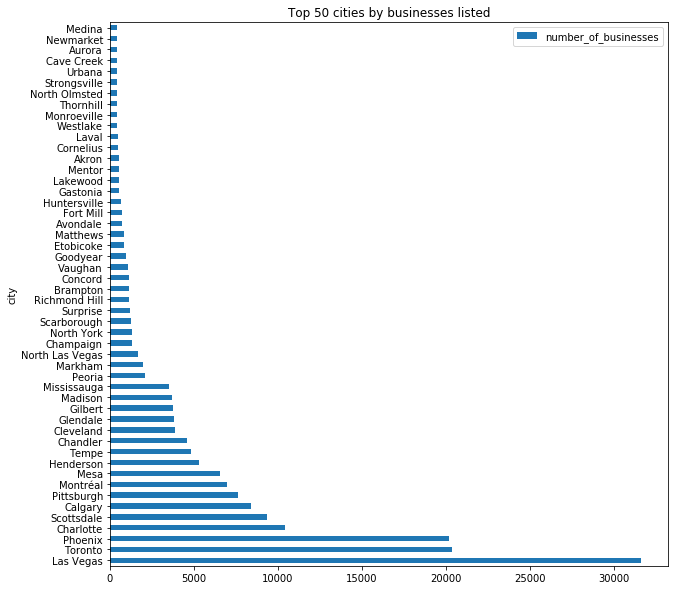

In [14]:
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10])
plt.title('Top 50 cities by businesses listed')

## No Data on NYC!!!

In [15]:
test_df = df_business[df_business['city']=='New York']

In [16]:
test_df.shape

(1, 15)

## Cities with most reviews and best ratings for their businesses

In [17]:
city_business_reviews = df_business[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

,review_count,stars
city,,
Las Vegas,2360735,3.653726
Phoenix,842321,3.583808
Toronto,583512,3.414367
Scottsdale,439439,3.874331
Charlotte,371580,3.492660
Pittsburgh,262412,3.586632
Henderson,261244,3.729230
Tempe,229594,3.639671
Mesa,197214,3.562795


Text(0.5, 1.0, 'Top 50 cities by reviews')

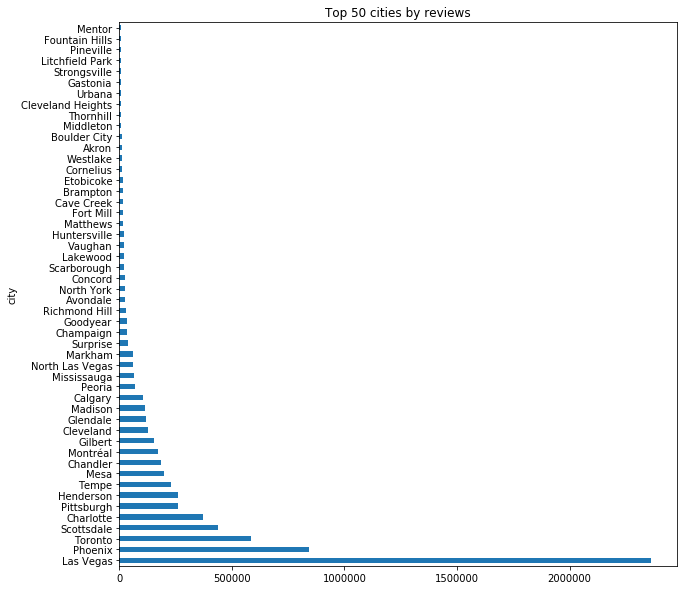

In [18]:
city_business_reviews['review_count'][0:50].plot(kind='barh', stacked=False, figsize=[10,10])
plt.title('Top 50 cities by reviews')

Text(0.5, 1.0, 'Cities with greater than 50k reviews ranked by average stars')

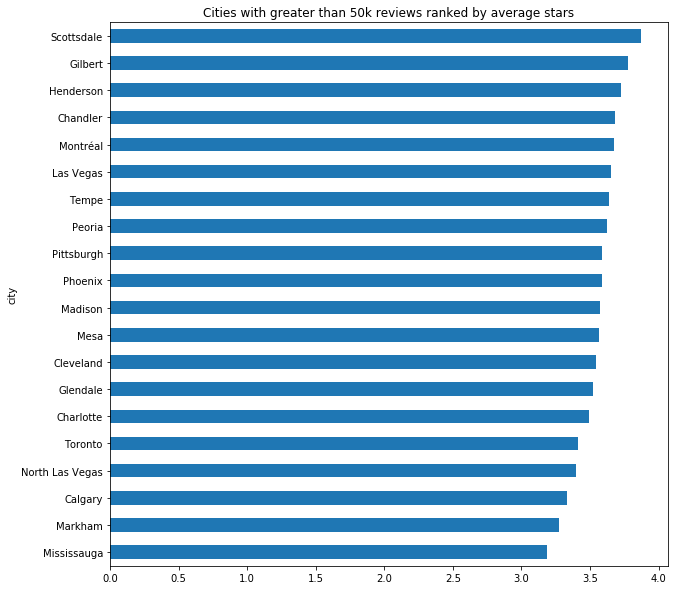

In [19]:
city_business_reviews[city_business_reviews.review_count > 50000]['stars'].sort_values()\
.plot(kind='barh', stacked=False, figsize=[10,10])
plt.title('Cities with greater than 50k reviews ranked by average stars')

In [20]:
df_business[df_business['city']=='Scottsdale']

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13,5fb9532f5884f05b67a0dcb2,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
53,5fb9532f5884f05b67a0dcda,gflx3mAzi4iG20NOUz19eA,BeStitched Needlepoint,"6990 E Shea Blvd, Ste 124",Scottsdale,AZ,85254,33.582962,-111.930651,3.5,11,1,"{'BusinessParking': '{'garage': False, 'street...","Arts & Crafts, Shopping","{'Wednesday': '10:0-15:0', 'Thursday': '10:0-1..."
72,5fb9532f5884f05b67a0dced,5ZgMwaMPLV4EB71KtLg7EQ,Maximum Performance Batting Cages & Training C...,"7625 E Redfield Rd, Ste 400",Scottsdale,AZ,85260,33.612633,-111.916143,5.0,3,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Batting Cages, Active Life","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."
88,5fb9532f5884f05b67a0dcfd,dee5uffullqnbI7VM0K7FA,Darroch Motorsports,501 N Scottsdale Rd,Scottsdale,AZ,85257,33.453842,-111.926003,3.5,3,0,None,"Automotive, Car Dealers","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
106,5fb9532f5884f05b67a0dd0f,2sbmuE1_cJrEP7JwO0l-zQ,Royal skincare,"7127 E Sahuaro Dr S, Suit 105",Scottsdale,AZ,85254,33.583540,-111.926826,5.0,4,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCard...","Skin Care, Beauty & Spas, Acne Treatment","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209319,5fb9533d5884f05b67a40e4c,00liP5s4IKsq97EH4Cc0Tw,Starbucks,9051 E. Indian Bend Road,Scottsdale,AZ,85250,33.538119,-111.886227,2.0,69,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '4:0-20:0', 'Tuesday': '4:0-20:0', ..."
209323,5fb9533d5884f05b67a40e50,flQWX5Gz3R32-kaebf0fPA,Ziegler Fiesta Bowl Museum,"7135 E Camelback Rd, Ste 190",Scottsdale,AZ,85251,33.500506,-111.928525,4.5,7,1,{'GoodForKids': 'True'},"Museums, Arts & Entertainment","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'..."
209326,5fb9533d5884f05b67a40e53,btnFN2GT-uVk_CbxFBYIFA,Raintree Dental,"9304 E Raintree Dr, Ste 130",Scottsdale,AZ,85260,33.619742,-111.881428,4.0,43,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...","Health & Medical, General Dentistry, Dentists,...","{'Monday': '7:30-16:30', 'Tuesday': '7:30-16:3..."
209375,5fb9533d5884f05b67a40e84,TLEXFQf9UT4PV5QJrc3QPw,PC Pool Care,"7735 E Evans Rd, Ste 203",Scottsdale,AZ,85260,33.616084,-111.914113,4.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Active Life, Swimming Pools, Po...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


In [21]:
df_business['stars'].value_counts()


4.0    39199
3.5    38079
4.5    29940
3.0    28634
5.0    27080
2.5    21435
2.0    13124
1.5     6004
1.0     5898
Name: stars, dtype: int64

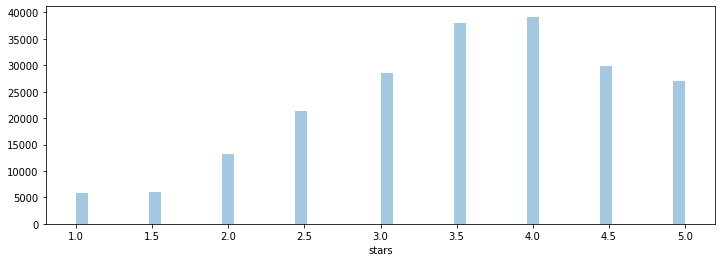

In [22]:
sns.distplot(df_business.stars, kde=False)


## Open vs Closed

In [23]:
df_business['is_open'].value_counts()

1    168903
0     40490
Name: is_open, dtype: int64

# Let's look into user tips on business before looking at reviews

In [24]:
df_tip = pd.DataFrame(list(db.tip.find({})))

In [25]:
df_tip.head(10)

,_id,user_id,business_id,text,date,compliment_count
0,5fb94e63c64442e3c11d1f2f,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
1,5fb94e63c64442e3c11d1f30,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
2,5fb94e63c64442e3c11d1f31,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
3,5fb94e63c64442e3c11d1f32,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
4,5fb94e63c64442e3c11d1f33,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0
5,5fb94e63c64442e3c11d1f34,2hdR7KYAmnCk2FjTnPFsuw,rcaPajgKOJC2vo_l3xa42A,Kelly is an awesome waitress there!,2012-05-29 02:05:56,0
6,5fb94e63c64442e3c11d1f35,gxVQZJVeKBUk7jEhSyqv-A,5FIOXmUE3qMviX9GafGH-Q,Get a tsoynami for sure.,2010-01-30 02:03:16,0
7,5fb94e63c64442e3c11d1f36,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0
8,5fb94e63c64442e3c11d1f37,DsWg3leomfasGs3j0rOfbQ,hfBrethLHS9iXeBNR8MtzQ,Check out the great assortment of organic & co...,2011-09-30 18:38:47,0
9,5fb94e63c64442e3c11d1f38,SF83eQjb7XUiXuZVzMtzjQ,ow3oP3cfmhlfmSsGaXe25Q,"Lovely locale, good food, but felt pricy.",2013-08-16 15:14:22,0


In [26]:
df_tip.shape

(1320761, 6)

## How many of the selected words are used in the user tips?

In [27]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
selected_word_count = vectorizer.fit_transform(df_tip['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [29]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(1320761, 11)

In [30]:
word_count_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
word_count_array.sum(axis=0)


array([26777, 98862,  6298, 34070, 34640,  4017, 12400,  3281,  1664,
        1025,  1360])

In [32]:
temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})


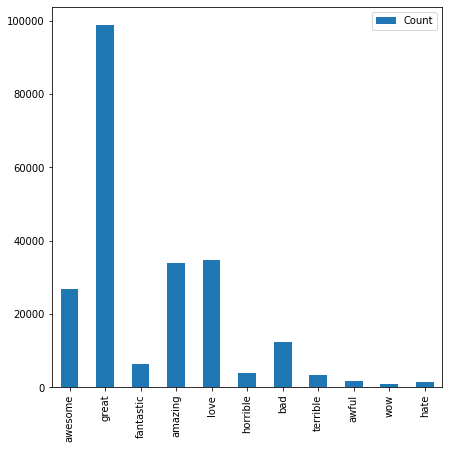

In [33]:
temp.plot(kind='bar', stacked=False, figsize=[7,7])


## Let's look at one restaurant with high star rating and one with low star rating and see what the user tips look like

In [34]:
df_business[(df_business['city'] == 'Las Vegas') & (df_business['stars'] == 4.5)]

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
17,5fb9532f5884f05b67a0dcb6,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,3131 Las Vegas Blvd,Las Vegas,NV,89109,36.125732,-115.167608,4.5,32,0,"{'BusinessParking': '{'garage': True, 'street'...","Shopping, Shoe Stores, Fashion",None
84,5fb9532f5884f05b67a0dcf9,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,,Las Vegas,NV,89109,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
210,5fb9532f5884f05b67a0dd77,4jIwNa8twpfqvsHuWBphZw,103 Hot Pilates & Yoga,"4245 S Grand Canyon, Ste 118",Las Vegas,NV,89147,36.112381,-115.306631,4.5,81,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Yoga, Pilates, Active Life, Fitness & Instruct...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ..."
244,5fb9532f5884f05b67a0dd99,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",Las Vegas,NV,89146,36.125569,-115.210911,4.5,1142,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Restaurants, Specialty Food, Japanese, Sushi B...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
276,5fb9532f5884f05b67a0ddb9,V6A5FZ9OfZ7r1Tc7x4CYXg,Verizon Authorized Retailer - GoWireless,"9360 W Flamingo Rd, Ste 105",Las Vegas,NV,89147,36.116179,-115.295056,4.5,20,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Mobile Phone Accessories, Wholesale Stores, Sh...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209170,5fb9533d5884f05b67a40db7,PIXl4WvAqjl2w9Lj81zXvQ,Zest - Bistro & Bar,"10670 Southern Highlands Pkwy, Ste 102",Las Vegas,NV,89141,35.995151,-115.206840,4.5,744,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","American (New), Karaoke, Restaurants, Lounges,...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
209194,5fb9533d5884f05b67a40dcf,9y01C_R58zY0NjRb4IxNgA,Centennial Hills Orthodontics,"7445 W Azure Dr, Ste 120",Las Vegas,NV,89130,36.273987,-115.257596,4.5,7,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Dentists, Orthodontists, Health & Medical","{'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'..."
209259,5fb9533d5884f05b67a40e10,0JWGJCjbWEx3cSSfFRW7Ug,Lora Boudreaux,"7331 W Lake Mead Blvd, Ste 103, Canyon Falls Spa",Las Vegas,NV,89128,36.194769,-115.252503,4.5,7,1,"{'BusinessParking': '{'garage': False, 'street...","Hair Salons, Massage, Day Spas, Skin Care, Bea...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
209309,5fb9533d5884f05b67a40e42,8yidA5O39XM4I1yvlTp2Fw,Patty's Closet,"7920 S Rainbow Blvd, Ste 115",Las Vegas,NV,89139,36.044718,-115.242705,4.5,52,0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Shopping, Fashion, Shoe Stores",None


In [35]:
df_business[df_business.name=="Veggie House"]


,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
244,5fb9532f5884f05b67a0dd99,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",Las Vegas,NV,89146,36.125569,-115.210911,4.5,1142,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Restaurants, Specialty Food, Japanese, Sushi B...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
196380,5fb9533c5884f05b67a3dbc1,azZB7_4acdXpzTU3GAFZTQ,Veggie House,303 Centre St SW,Calgary,AB,T2G 2B9,51.050222,-114.062726,3.5,3,0,None,"Restaurants, Vegan",None


In [36]:
veggie_house = df_tip[df_tip.business_id=='AtD6B83S4Mbmq0t7iDnUVA']

In [37]:
veggie_house.head(10)

,_id,user_id,business_id,text,date,compliment_count
3070,5fb94e63c64442e3c11d2b2d,8fsZcLADFrPTbGrFqMACpg,AtD6B83S4Mbmq0t7iDnUVA,Don't go here. Service sucks. They just don't...,2012-10-20 22:24:47,0
10503,5fb94e64c64442e3c11d4836,xLoEhU6zvFzcc0erH7gfyg,AtD6B83S4Mbmq0t7iDnUVA,Chef Kenny comes around and talks to his guest...,2014-04-06 20:09:22,0
13563,5fb94e64c64442e3c11d542a,MfFGe1yzLKlfiH0s_Lkpfw,AtD6B83S4Mbmq0t7iDnUVA,Hot Sweet & Sour Soup was yummy!!,2016-01-04 20:39:16,0
18267,5fb94e64c64442e3c11d668a,XR8aay5RuQSBdGppG1dFmA,AtD6B83S4Mbmq0t7iDnUVA,Try Kenny's fried oyster mushrooms! Yum!,2012-10-22 20:34:43,0
20511,5fb94e64c64442e3c11d6f4e,blJ-tBqBCqg9WU2MM8fPew,AtD6B83S4Mbmq0t7iDnUVA,"Great food, one of the best vegan restaurants ...",2017-04-02 01:50:03,0
23734,5fb94e64c64442e3c11d7be5,KQm9OgdujLZiMRTksmj83w,AtD6B83S4Mbmq0t7iDnUVA,Spicy Cajun Fish and Roti with Curry is a must...,2017-11-04 21:21:15,0
42670,5fb94e64c64442e3c11dc5dd,Z24wWXLyJ9K1ftiHZrP8Sw,AtD6B83S4Mbmq0t7iDnUVA,Great food! All vegetarian. Will return,2014-05-11 19:25:58,0
47683,5fb94e65c64442e3c11dd972,7mLmD8lUsIrL-MP0lU445g,AtD6B83S4Mbmq0t7iDnUVA,Most delicious Chinese food in Vegas! Can't wa...,2012-10-07 05:01:13,0
50194,5fb94e65c64442e3c11de341,2iIZE5hj78sSdbwGFrZ1jA,AtD6B83S4Mbmq0t7iDnUVA,Excellent!!!,2013-03-02 04:24:34,0
59442,5fb94e65c64442e3c11e0761,Ws4PEHZHZQ13_sovIIDUsQ,AtD6B83S4Mbmq0t7iDnUVA,Access: If you have bad knees and can't do the...,2014-04-16 02:29:07,0


In [38]:
veggie_house.shape

(242, 6)

In [39]:
veggie_house_selected_word_count = vectorizer.fit_transform(veggie_house['text'].values.astype('U'))



In [40]:
word_count_array = veggie_house_selected_word_count.toarray()
temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})


In [41]:
temp

,Count
awesome,12
great,20
fantastic,0
amazing,17
love,16
horrible,0
bad,3
terrible,0
awful,0
wow,0


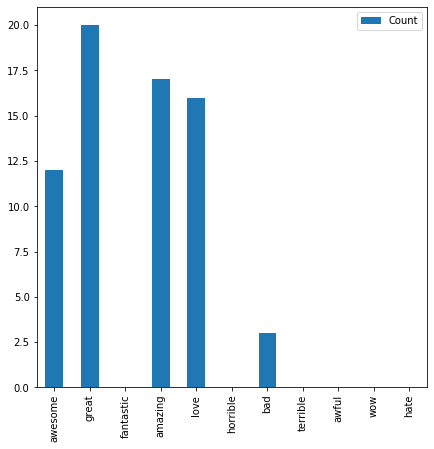

In [42]:
temp.plot(kind='bar', stacked=False, figsize=[7,7])

In [43]:
df_business[['name', 'review_count', 'city', 'stars']][df_business.review_count>1000].sort_values(ascending=True, by="stars")[0:15]


,name,review_count,city,stars
175656,Cox Communications,1008,Phoenix,1.0
87338,Spirit Airlines,1288,Las Vegas,1.5
79159,Cirque du Soleil - Criss Angel Believe,1037,Las Vegas,1.5
62234,Fox Rent A Car,1513,Las Vegas,1.5
168825,Circus Circus Las Vegas Hotel and Casino,3037,Las Vegas,2.0
132075,Westgate Las Vegas Resort & Casino,1932,Las Vegas,2.0
68193,Hakkasan Nightclub,1914,Las Vegas,2.5
11884,Plaza Hotel & Casino,1236,Las Vegas,2.5
32120,Senor Frog's,1056,Las Vegas,2.5
96939,Monte Carlo Hotel And Casino,2659,Las Vegas,2.5


In [44]:
df_business[df_business['name'] == "Luxor Hotel and Casino Las Vegas"]

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
112687,5fb953375884f05b67a294d4,AV6weBrZFFBfRGCbcRGO4g,Luxor Hotel and Casino Las Vegas,3900 Las Vegas Blvd S,Las Vegas,NV,89109,36.097341,-115.176339,2.5,4670,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Nightlife, Hotels & Travel, Arts & Entertainme...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [45]:
luxor_hotel = df_tip[df_tip.business_id=='AV6weBrZFFBfRGCbcRGO4g']

In [46]:
luxor_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 440 to 1314922
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               715 non-null    object
 1   user_id           715 non-null    object
 2   business_id       715 non-null    object
 3   text              715 non-null    object
 4   date              715 non-null    object
 5   compliment_count  715 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 39.1+ KB


In [47]:
luxor_hotel_selected_word_count = vectorizer.fit_transform(luxor_hotel['text'].values.astype('U'))


In [48]:
word_count_array = luxor_hotel_selected_word_count.toarray()
temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

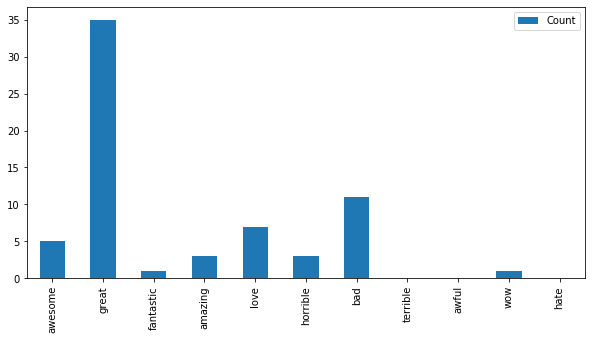

In [49]:
temp.plot(kind='bar', stacked=False, figsize=[10,5])


## Top 10 Categories of Business

In [50]:
category_business_counts = df_business[['categories', 'business_id']].groupby(['categories'])['business_id'].agg('count').sort_values(ascending=False)



In [51]:
category_business_counts = pd.DataFrame(data=category_business_counts)

In [52]:
category_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

Text(0.5, 1.0, 'Top 10 categories by businesses listed')

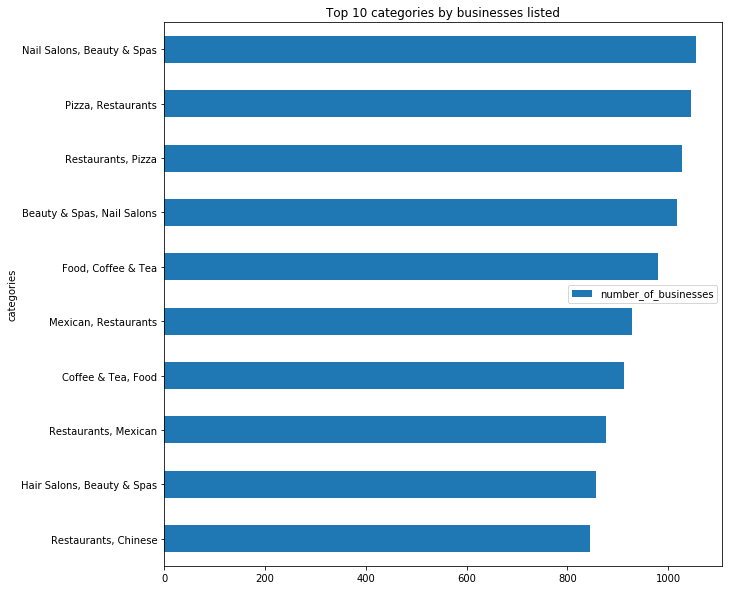

In [53]:
category_business_counts[0:10].sort_values(ascending=True, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10])
plt.title('Top 10 categories by businesses listed')

## What else can I look at?


In [54]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [55]:
df_business.stars.value_counts()


4.0    39199
3.5    38079
4.5    29940
3.0    28634
5.0    27080
2.5    21435
2.0    13124
1.5     6004
1.0     5898
Name: stars, dtype: int64

In [57]:
df_business.head()

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,5fb9532f5884f05b67a0dca5,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,5fb9532f5884f05b67a0dca6,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
2,5fb9532f5884f05b67a0dca7,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
3,5fb9532f5884f05b67a0dca8,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
4,5fb9532f5884f05b67a0dca9,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None


In [60]:
bc_buffet = df_business[df_business.name=="Bacchanal Buffet"]
bc_buffet

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
81550,5fb953355884f05b67a21b33,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.115929,-115.176238,4.0,10129,1,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...","Sandwiches, Breakfast & Brunch, Food, Restaura...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'..."


In [61]:
bc_buffet_tip = df_tip[df_tip.business_id=='RESDUcs7fIiihp38-d6_6g']
bc_buffet_tip.head()

,_id,user_id,business_id,text,date,compliment_count
1908,5fb94e63c64442e3c11d26a3,FUHxeKjaVuuiFWrJwQaNaQ,RESDUcs7fIiihp38-d6_6g,Free soft drinks served by waiters!,2015-09-15 21:30:10,0
6277,5fb94e64c64442e3c11d37b4,jOW3BGthCDL3l7Dd6AWZtA,RESDUcs7fIiihp38-d6_6g,Hands down best buffet i have ever had!!!!!!!!...,2012-10-29 01:13:05,1
8903,5fb94e64c64442e3c11d41f6,lDKbTlZqjIn2gn490gU2HQ,RESDUcs7fIiihp38-d6_6g,Weekday lunch: $40s. \nWeekday dinner: $50s\nL...,2015-09-04 01:56:16,0
11700,5fb94e64c64442e3c11d4ce3,F_5_UNX-wrAFCXuAkBZRDw,RESDUcs7fIiihp38-d6_6g,24 hours of Bacchanal starts now. LOL,2012-12-12 18:03:17,1
11978,5fb94e64c64442e3c11d4df9,FUHxeKjaVuuiFWrJwQaNaQ,RESDUcs7fIiihp38-d6_6g,The best Italian starts at 3pm,2015-09-15 21:32:52,0


In [56]:
# Group the businesses by ratings?
# what about reviews? they are too big...should I start small with specific businesses? 


In [68]:
df_business.stars.value_counts()


4.0    39199
3.5    38079
4.5    29940
3.0    28634
5.0    27080
2.5    21435
2.0    13124
1.5     6004
1.0     5898
Name: stars, dtype: int64

In [75]:
df_scottsdale = df_business[df_business.city == 'Scottsdale']

In [74]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   _id           209393 non-null  object 
 1   business_id   209393 non-null  object 
 2   name          209393 non-null  object 
 3   address       209393 non-null  object 
 4   city          209393 non-null  object 
 5   state         209393 non-null  object 
 6   postal_code   209393 non-null  object 
 7   latitude      209393 non-null  float64
 8   longitude     209393 non-null  float64
 9   stars         209393 non-null  float64
 10  review_count  209393 non-null  int64  
 11  is_open       209393 non-null  int64  
 12  attributes    180348 non-null  object 
 13  categories    208869 non-null  object 
 14  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 24.0+ MB


In [77]:
df_scottsdale.stars.value_counts()

5.0    2213
4.0    1746
4.5    1638
3.5    1479
3.0     959
2.5     667
2.0     348
1.0     162
1.5     130
Name: stars, dtype: int64

In [78]:
df_vegas = df_business[df_business.city == 'Las Vegas']

In [79]:
df_vegas.stars.value_counts()

4.0    5971
4.5    5245
5.0    5138
3.5    5130
3.0    3865
2.5    2862
2.0    1851
1.5     837
1.0     732
Name: stars, dtype: int64

In [87]:
df_review = pd.DataFrame(list(db.review.aggregate({"$sample":{"size":3}})))

TypeError: pipeline must be a list

In [90]:
db.review.find_one({})

{'_id': ObjectId('5fb94ec16260c7605330c932'),
 'review_id': 'LG2ZaYiOgpr2DK_90pYjNw',
 'user_id': 'V34qejxNsCbcgD8C0HVk-Q',
 'business_id': 'HQl28KMwrEKHqhFrrDqVNQ',
 'stars': 5.0,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'text': "I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",
 'date': '2015-12-05 03:18:11'}

In [127]:
review_sample = db.review.aggregate([ { "$sample": { "size": 20000 } } ])

In [128]:
list(test)

[]

In [129]:
df_review_sample = pd.DataFrame(list(review_sample))

In [130]:
df_review_sample.head()

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5fb94edd6260c7605338fde0,DNyr7RRyIHeTB0qSKL7bPg,_3LNp4ZdM2z44PJezecz5g,aFqPf3gy0C7SvkB3iklE7g,4.0,2,1,1,Great experience during my short stay in Phoen...,2014-11-12 00:12:36
1,5fb950326260c760539804d1,lXxJbPHsVpzuVRVBbK3uRw,VyH30Uk_aMJT1QptcDaSgw,jCNBZnkIFv_0omLVTgNR6Q,3.0,0,0,0,"Food was decent. However, ordered a to go deli...",2018-09-20 07:59:48
2,5fb94f736260c7605362e910,y-Ax6HaYzhxqDYpG8SHrWA,K6RPOP0IRkZddCKD1S6FUA,9S7RUjzkdpU4MDxUxkvLvg,1.0,0,1,0,Our server was obviously not in the mindframe ...,2016-06-25 02:46:10
3,5fb950386260c7605399d426,pN-WLXH0wMQM71-lEZGVOQ,KpkSr869jNIhJix3cGM8OQ,0uR48n5SYcLE_DLcjONZPg,5.0,0,0,0,I have to say I love subway but after now tryi...,2016-11-09 01:23:52
4,5fb94f326260c7605350f37d,tOgwHvAj8VKijvEyQRY_YQ,N1B-P3MVLmZT5yArrK2dYw,UPph80wgbHn-jX9F3fKC6w,5.0,1,0,0,"We used Germaine for my cat, Chester. Sadly, ...",2019-02-18 00:40:24


In [184]:
df_review_sample.to_csv("data/review_sample.csv")

# K-Means

In [131]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [132]:
# Applying K-Means

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_review_sample['text'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [133]:
# Printing centroids as vectors

print("\n cluster centers:")
print(kmeans.cluster_centers_)


 cluster centers:
[[1.21817797e-03 9.69731505e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.49307415e-03 3.59392932e-04 0.00000000e+00 ... 5.27509627e-05
  5.27509627e-05 4.38914540e-05]
 [4.65648508e-03 1.70782779e-03 2.08705003e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.46471855e-04 1.47932559e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.49288765e-04 3.80984531e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38903440e-03 3.70473116e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [134]:
# Printing centroids as words
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")


 top features (words) for each cluster:
0, recommend, job, hair, time, great, highly, friendly, nails, staff, did
1, place, like, good, love, just, nice, best, time, great, really
2, service, car, told, said, time, customer, minutes, just, asked, called
3, pizza, crust, good, great, place, cheese, sauce, order, toppings, wings
4, chicken, good, ordered, food, sauce, fries, burger, place, like, salad
5, great, food, service, place, friendly, love, good, amazing, atmosphere, staff
6, sushi, roll, rolls, good, place, service, fresh, great, tuna, food
7, food, good, service, place, restaurant, really, time, delicious, friendly, staff


In [135]:
# Limit the number of features and see if the words of the topics change.
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_review_sample['text'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}: {', '.join(features[i] for i in centroid)}")


 top features for each cluster with 1000 max features:
0: time, service, did, car, customer, told, said, just, work, called
1: chicken, good, ordered, food, sauce, like, place, fries, burger, salad
2: love, place, great, food, good, amazing, friendly, service, best, staff
3: great, service, food, place, friendly, staff, good, amazing, definitely, time
4: pizza, crust, good, great, place, cheese, sauce, order, best, toppings
5: food, good, service, place, restaurant, time, really, great, just, like
6: sushi, roll, rolls, good, place, service, fresh, great, food, tuna
7: place, like, good, just, nice, best, time, staff, ve, really


In [136]:
print("\n random sample of stars in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print(f"cluster {i}:")
    for review in sample_reviews:
        print(f"    {df_review_sample.loc[review]['stars']}")


 random sample of stars in each cluster
cluster 0:
    2.0
    1.0
    1.0
cluster 1:
    3.0
    4.0
    4.0
cluster 2:
    5.0
    4.0
    5.0
cluster 3:
    5.0
    5.0
    5.0
cluster 4:
    5.0
    2.0
    5.0
cluster 5:
    4.0
    4.0
    3.0
cluster 6:
    4.0
    5.0
    1.0
cluster 7:
    4.0
    4.0
    1.0


In [137]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)


In [125]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = df_review_sample.loc[cluster].dropna()['stars']
    most_common = Counter(topics).most_common()
    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j][0]} ({most_common[j][1]} reviews)")

Cluster 0:
     5.0 (26 reviews)
     1.0 (3 reviews)
     2.0 (3 reviews)
     4.0 (1 reviews)
Cluster 1:
     5.0 (95 reviews)
     4.0 (48 reviews)
     3.0 (24 reviews)
     2.0 (15 reviews)
     1.0 (12 reviews)
Cluster 2:
     5.0 (58 reviews)
     4.0 (25 reviews)
     3.0 (4 reviews)
     2.0 (2 reviews)
Cluster 3:
     5.0 (112 reviews)
     1.0 (56 reviews)
     4.0 (34 reviews)
     3.0 (14 reviews)
     2.0 (14 reviews)
Cluster 4:
     1.0 (55 reviews)
     4.0 (24 reviews)
     5.0 (22 reviews)
     2.0 (20 reviews)
     3.0 (17 reviews)
Cluster 5:
     5.0 (14 reviews)
     4.0 (12 reviews)
     2.0 (5 reviews)
     3.0 (3 reviews)
     1.0 (3 reviews)
Cluster 6:
     4.0 (26 reviews)
     5.0 (20 reviews)
     3.0 (11 reviews)
     1.0 (7 reviews)
     2.0 (5 reviews)
Cluster 7:
     5.0 (66 reviews)
     4.0 (31 reviews)
     1.0 (17 reviews)
     2.0 (9 reviews)
     3.0 (8 reviews)
Cluster 8:
     4.0 (17 reviews)
     5.0 (17 reviews)
     1.0 (9 reviews)
     3.0 (9

In [138]:
#code to group all the reviews by each business
review_df_agg=df_review_sample.groupby('business_id')['text'].sum()


In [139]:
#renaming the columns business_id for index and all_reviews for all aggregated reviews
review_df_for_sklearn=pd.DataFrame({'business_id':review_df_agg.index,'all_reviews':review_df_agg.values})
ds

In [140]:
#Merging both reviews and business dataframes on column business_id as it the unique and common column for both dataframes
review_business=pd.merge(review_df_for_sklearn,df_business,on='business_id',how='left')


In [141]:
#checking the shape of merged dataframe
review_business.shape

(14787, 16)

In [148]:
#as the review_count has different values it needs to be normalized
from scipy.stats import zscore

review_count_normalized=zscore(review_business['review_count'])


In [149]:
review_count_normalized

array([ 3.96960576,  0.45829154, -0.48233059, ...,  0.03795903,
       -0.18502223, -0.35161743])

In [151]:
review_count_normalized.shape

(14787,)

In [153]:
#using tf-idf to do feature extraction from review contents for models
import sklearn.feature_extraction.text as sk_text
vectorizer=sk_text.TfidfVectorizer(stop_words='english',max_features=1000,min_df=2)
matrix=vectorizer.fit_transform(review_business['all_reviews'])

print(type(matrix))
print(matrix.toarray())



<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.19798269]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [154]:
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '15', '20', '24', '25', '30', '40', '45', '50', '99', 'able', 'absolutely', 'accommodating', 'actually', 'add', 'added', 'addition', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'airport', 'amazing', 'ambiance', 'answer', 'anymore', 'apparently', 'appetizer', 'appetizers', 'appointment', 'appreciate', 'area', 'aren', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bacon', 'bad', 'bag', 'baked', 'bar', 'barely', 'bartender', 'based', 'basically', 'bathroom', 'bbq', 'beans', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'bottle', 'bought', 'bowl', 'box', 'boyfriend', 'bread', 'break', 'breakfast', 'bring', 'broth', 'brought', 'brunch', 'buffet', 'building', 'bun', 'burger', 'burgers', 'burrito', 'business', '

In [155]:
#converting the matrix to array format
tfif_data=matrix.toarray()


In [156]:
#know the shape of the previous array
tfif_data.shape

(14787, 1000)

In [158]:
#merging review_count and tfid_data arrays
concat_matrix=np.column_stack((tfif_data,review_count_normalized))
concat_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.96960576],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.19798269,  0.45829154],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.48233059],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.03795903],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.18502223],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.35161743]])

# Models

## Linear Regression


In [160]:
#applying linear regression model by giving X as concat matrix and y as stars column

# import the class
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=concat_matrix
y=review_business['stars']

#dividing the data in to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =1)
print(X_train.shape)
print(X_test.shape)

(11829, 1001)
(2958, 1001)


In [161]:
# instantiate the model (using the default parameters)
lr=LinearRegression()

# fit the model with data
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 0.47698708945704993
Final score (RMSE): 0.6906425192942076


# Classification Models

In [162]:
from sklearn import preprocessing

#one hot encoding on stars column 
le = preprocessing.LabelEncoder()
le.fit(review_business['stars'])

list(le.classes_)

y = le.transform(review_business['stars'])

In [163]:
#splitting the data in to training and test datasets
X_train, X_test,y_train,y_test = train_test_split(concat_matrix,y,test_size=0.25,random_state=1)

## Support Vector Machine Model

In [164]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [165]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('Accuracy of SVM on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM on test set: 0.33


## Nearest Neighbor Model

In [166]:
#knn classfrom sklearn.neighbors import KNeighborsClassifierifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [167]:
from sklearn import metrics
print('Accuracy of nearest neighbor classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of nearest neighbor classifier on test set: 0.22


## Logistic Regression

In [168]:
#logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

/Users/saehuh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
from sklearn import metrics
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) 


Accuracy of logistic regression classifier on test set: 0.32


## Min-Max Normalization for Multionominal Naive Bayes as it does not take negative values which happens in z-score normalization.

In [173]:
minmax=review_business['review_count'].max()-review_business['review_count'].min()
nmn_reviewcount=(review_business['review_count']-review_business['review_count'].min())/minmax
nmn_rc_nparray=nmn_reviewcount.values
nmn_rc_nparray.shape
import numpy as np
concat_matrix=np.column_stack((tfif_data,nmn_rc_nparray))
X=concat_matrix

## Multi-Nominal Naive Bayes Model


In [174]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

clf.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred=clf.predict(X_test)
print('Accuracy of Multinomial on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Multinomial on test set: 0.31


# Tensofflow Regression

In [177]:
import tensorflow as tf
print("Tensor Flow Version: {}".format(tf.__version__))

Tensor Flow Version: 2.3.1


In [179]:
import io
import requests
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

x=concat_matrix

le = preprocessing.LabelEncoder()
le.fit(review_business['stars'])

list(le.classes_)

y = le.transform(review_business['stars'])

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [185]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import io
import requests
from sklearn import metrics

model = Sequential()

model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

Epoch 1/100
463/463 - 1s - loss: 7.7454
Epoch 2/100
463/463 - 1s - loss: 2.0308
Epoch 3/100
463/463 - 1s - loss: 1.8051
Epoch 4/100
463/463 - 1s - loss: 1.7463
Epoch 5/100
463/463 - 1s - loss: 1.7065
Epoch 6/100
463/463 - 1s - loss: 1.6354
Epoch 7/100
463/463 - 0s - loss: 1.5253
Epoch 8/100
463/463 - 1s - loss: 1.3935
Epoch 9/100
463/463 - 1s - loss: 1.2484
Epoch 10/100
463/463 - 1s - loss: 1.1183
Epoch 11/100
463/463 - 1s - loss: 1.0096
Epoch 12/100
463/463 - 1s - loss: 0.9263
Epoch 13/100
463/463 - 1s - loss: 0.8577
Epoch 14/100
463/463 - 1s - loss: 0.8018
Epoch 15/100
463/463 - 0s - loss: 0.7576
Epoch 16/100
463/463 - 1s - loss: 0.7173
Epoch 17/100
463/463 - 1s - loss: 0.6838
Epoch 18/100
463/463 - 1s - loss: 0.6547
Epoch 19/100
463/463 - 1s - loss: 0.6280
Epoch 20/100
463/463 - 1s - loss: 0.6032
Epoch 21/100
463/463 - 1s - loss: 0.5809
Epoch 22/100
463/463 - 1s - loss: 0.5597
Epoch 23/100
463/463 - 1s - loss: 0.5412
Epoch 24/100
463/463 - 1s - loss: 0.5213
Epoch 25/100
463/463 - 1s

In [186]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath="best_weight1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model = Sequential()
    model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1)) # Output

    model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


print('Training finished...Loading the best model')  
print()
model.load_weights("best_weight1.hdf5") # load weights from best model

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))



0
Epoch 1/100
347/347 - 1s - loss: 3.1664 - val_loss: 2.0237
Epoch 2/100
347/347 - 1s - loss: 1.8063 - val_loss: 2.0667
Epoch 3/100
347/347 - 1s - loss: 1.6751 - val_loss: 2.0124
Epoch 4/100
347/347 - 1s - loss: 1.5059 - val_loss: 2.0147
Epoch 5/100
347/347 - 1s - loss: 1.2698 - val_loss: 2.2473
Epoch 6/100
347/347 - 1s - loss: 1.0106 - val_loss: 2.3170
Epoch 7/100
347/347 - 1s - loss: 0.7468 - val_loss: 2.4360
Epoch 8/100
347/347 - 1s - loss: 0.5581 - val_loss: 2.5004
Epoch 00008: early stopping
1
Epoch 1/100
347/347 - 1s - loss: 3.2502 - val_loss: 2.1509
Epoch 2/100
347/347 - 1s - loss: 1.8366 - val_loss: 1.9739
Epoch 3/100
347/347 - 1s - loss: 1.7349 - val_loss: 2.0728
Epoch 4/100
347/347 - 1s - loss: 1.6201 - val_loss: 2.1159
Epoch 5/100
347/347 - 1s - loss: 1.4618 - val_loss: 2.0564
Epoch 6/100
347/347 - 1s - loss: 1.2590 - val_loss: 2.2885
Epoch 7/100
347/347 - 1s - loss: 1.0146 - val_loss: 2.3039
Epoch 00007: early stopping
2
Epoch 1/100
347/347 - 1s - loss: 3.2028 - val_loss: 1